In [22]:
from tensorflow import keras 
from keras.models import Input
from tensorflow.keras.callbacks import ModelCheckpoint

import os, shutil
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, applications
from tensorflow.keras import models
from keras.layers import Dropout
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import  EfficientNetB2
from tensorflow.keras.callbacks import  TensorBoard
from keras.layers import Dense, Activation, Flatten, Conv2D, BatchNormalization,GlobalAveragePooling2D
from keras.models import Model
import albumentations
import cv2
from PIL import Image
import numpy as np

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("GPU: ", tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())
print(tf.version.VERSION)
image_size=150



Num GPUs Available:  1
GPU:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True
2.7.0


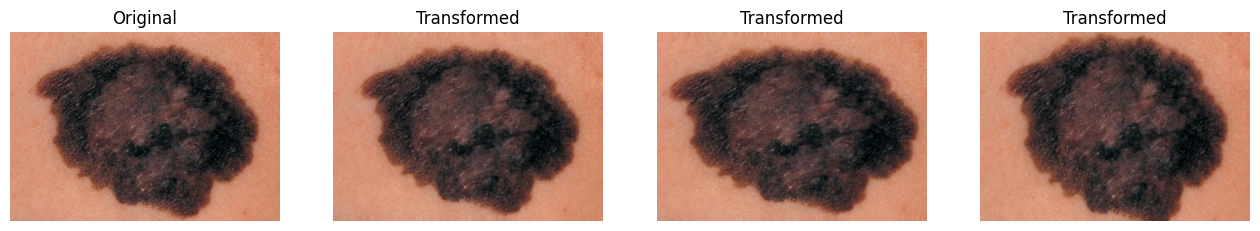

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the image
img = cv2.imread("C:/Users/Migue/Desktop/thesis_data/image_splits/validate/MEL/82d7c8ecba1bb065d7d0c0d807f8785e.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert the image from BGR to RGB

# Create the ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    zoom_range=0.1,
    horizontal_flip=False,
    channel_shift_range=.001
)

# Expand the dimensions of the image to match the required input shape for the ImageDataGenerator
img = np.expand_dims(img, axis=0)

# Visualize the original and transformed images
plt.figure(figsize=(16, 4))

# Display the original image
plt.subplot(1, 4, 1)
plt.imshow(img[0])
plt.title("Original")
plt.axis('off')

# Display three transformed images
for i in range(3):
    plt.subplot(1, 4, i + 2)
    
    # Set the random seed for the ImageDataGenerator
    np.random.seed(i)
    
    # Create a Python generator using the train_datagen.flow() method
    image_generator = train_datagen.flow(img, batch_size=1, seed=i)
    
    img_augmented = next(image_generator)[0]
    plt.imshow(img_augmented)
    plt.title("Transformed")
    plt.axis('off')

plt.show()


In [64]:
img = cv2.imread("C:/Users/Migue/Desktop/thesis_data/image_splits/validate/MEL/00f1b7bb9581e91250a2bb224c3321b8.jpg")

# Define the augmentation pipeline
transforms_train = albumentations.Compose([
        albumentations.Transpose(p=0.5),
        albumentations.VerticalFlip(p=0.5),
        albumentations.HorizontalFlip(p=0.5),
        albumentations.RandomBrightness(limit=0.2, p=0.75),
        albumentations.RandomContrast(limit=0.2, p=0.75),
        #albumentations.Lambda(image=to_uint8)
        #albumentations.CLAHE(clip_limit=4.0, p=0.7),
        albumentations.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
        albumentations.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
        albumentations.Resize(image_size, image_size),
        albumentations.Cutout(max_h_size=int(image_size * 0.375), max_w_size=int(image_size * 0.375), num_holes=1, p=0.7),
        albumentations.Normalize()
    ])



# Apply the augmentation
augmented = transforms_train(image=img)['image']

# Show the original and augmented images side by side
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(augmented)
axs[1].set_title("Transformed")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [20]:
image_size=150
# Define a function to convert input data to uint8
def to_uint8(image):
    return (image * 255).astype(np.uint8)

def get_transforms(image_size):

    transforms_train = albumentations.Compose([
        albumentations.Transpose(p=0.5),
        albumentations.VerticalFlip(p=0.5),
        albumentations.HorizontalFlip(p=0.5),
        albumentations.RandomBrightness(limit=0.2, p=0.75),
        albumentations.RandomContrast(limit=0.2, p=0.75),
        #albumentations.Lambda(image=to_uint8)
        #albumentations.CLAHE(clip_limit=4.0, p=0.7),
        albumentations.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
        albumentations.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
        albumentations.Resize(image_size, image_size),
        albumentations.Cutout(max_h_size=int(image_size * 0.375), max_w_size=int(image_size * 0.375), num_holes=1, p=0.7),
        albumentations.Normalize()
    ])

    transforms_val = albumentations.Compose([
        albumentations.Resize(image_size, image_size),
        albumentations.Normalize()
    ])


    return transforms_train, transforms_val


In [24]:
# Set parameters
num_classes = 3
batch_size = 128 
epochs = 20
filepath = "bestsave.h5"

# model 1 
-HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5)
-NO TRANSFER LEARNING
-RECALL IMPORTANCE
-layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
-NO CALLBACKS

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
def load_and_preprocess_data(image_size):
    # Load your dataset here and split into train and validation sets
    df=pd.read_csv("C:/Users/Migue/Desktop/thesis_data/centralized_truth.csv")

    base_dir="C:/Users/Migue/Desktop/thesis_data/image_splits"
    train_dir = os.path.join(base_dir, 'Training')
    test_dir = os.path.join(base_dir, 'Testing')
    validate_dir = os.path.join(base_dir, 'validate')
    # Apply the augmentations to the train and validation sets
    
    transforms_train, transforms_val = get_transforms(image_size)
    
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=lambda x: transforms_train(image=x)['image'])
    
    val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=lambda x: transforms_val(image=x)['image']
    )
    test_datagen = ImageDataGenerator(rescale=1./255)


    trainGen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=32,
    class_mode='categorical')

    valGen = val_datagen.flow_from_directory(
    validate_dir,
    target_size=(image_size, image_size),
    batch_size=32,
    class_mode='categorical')
    
    testGen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=32,
    color_mode="rgb",
    class_mode='categorical')
   
    # Apply the transformations to your dataset
    return trainGen, valGen

# Design the deep CNN model
def build_model(image_size, num_classes):
    #transfer learning
    #base_model = applications.Xception(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    #base_model.trainable = False
    #actually deep learning connected model
    
    model = models.Sequential([
        #base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    #Callbacks inclusion
#     checkpoint = ModelCheckpoint(filepath, monitor='val_recall', verbose=1, 
#                              save_best_only=True, mode='max')

#     reduce_lr = ReduceLROnPlateau(monitor='val_recall', factor=0.5, patience=2, 
#                                    verbose=1, mode='max', min_lr=0.00001)
                              
                              
#     callbacks_list = [checkpoint, reduce_lr]
    
    #IMPORTANT: make sure recall is valued more
    #class_weights = {0: 1.0, 1: 0, 2: 0}
    
    model.compile(optimizer=optimizers.Adam(lr=1e-3),
                  loss='categorical_crossentropy',
                  metrics=[keras.metrics.Recall(),'accuracy',tf.keras.metrics.FalseNegatives()])
    print("[INFO] compiled")
  
    return model#, class_weights#, callbacks_list


# Training and evaluating the model
def train_model(model, train_data, val_data, batch_size, epochs):
    
    reduce_lr = ReduceLROnPlateau(monitor='val_recall_11', factor=0.5, patience=3, 
                                    verbose=1, mode='max', min_lr=0.00001)
                              
                              
    callbacks_list = [reduce_lr]
    
    history = model.fit(train_data,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=val_data,
                       callbacks=callbacks_list,
                       class_weight={0: 1, 1: 7.0, 2: 6} #weigh class 1 with more importance (melanoma)
                       )

    return history



# Load and preprocess data
train_data, val_data = load_and_preprocess_data(image_size)
print("[INFO] creating model, transfer learning base [off now], callbacks and compiling...")
# Create the model
model = build_model(image_size, num_classes)

print("[INFO] training model...")

# Train and evaluate the model
history = train_model(model, train_data, val_data, batch_size, epochs)
print("[INFO] saving model...")

# Save the model
model.save('/models/melanoma_deep_cnn.h5')

C:\Users\Migue\anaconda3\envs\tensorflow123\lib\site-packages\albumentations\augmentations\transforms.py:1149: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
C:\Users\Migue\anaconda3\envs\tensorflow123\lib\site-packages\albumentations\augmentations\transforms.py:1175: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
C:\Users\Migue\anaconda3\envs\tensorflow123\lib\site-packages\albumentations\augmentations\dropout\cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Found 62626 images belonging to 3 classes.
Found 7828 images belonging to 3 classes.
Found 7828 images belonging to 3 classes.
[INFO] creating model, transfer learning base [off now], callbacks and compiling...
[INFO] compiled
[INFO] training model...


C:\Users\Migue\anaconda3\envs\tensorflow123\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1958/1958 [==============================] - 1686s 861ms/step - loss: 2.4248 - recall_12: 0.0079 - accuracy: 0.4245 - false_negatives_12: 62132.0000 - val_loss: 0.7457 - val_recall_12: 0.5084 - val_accuracy: 0.6897 - val_false_negatives_12: 3848.0000 - lr: 0.0010
Epoch 2/20
1958/1958 [==============================] - 1384s 707ms/step - loss: 2.4117 - recall_12: 0.0089 - accuracy: 0.4042 - false_negatives_12: 62067.0000 - val_loss: 0.7596 - val_recall_12: 0.4997 - val_accuracy: 0.7021 - val_false_negatives_12: 3916.0000 - lr: 0.0010
Epoch 3/20
1958/1958 [==============================] - 1380s 705ms/step - loss: 2.4107 - recall_12: 0.0081 - accuracy: 0.3758 - false_negatives_12: 62119.0000 - val_loss: 0.6807 - val_recall_12: 0.5910 - val_accuracy: 0.7164 - val_false_negatives_12: 3202.0000 - lr: 0.0010
Epoch 4/20
1958/1958 [==============================] - 1378s 704ms/step - loss: 2.4096 - recall_12: 0.0087 - accuracy: 0.3632 - false_negatives_12: 62084.0000 - val_loss: 0.7

KeyboardInterrupt: 

In [107]:
val_loss,val_recall, val_acc,fn = model.evaluate(val_data)
print('val_loss:', val_loss)
print('val_recall:', val_recall)
print('val_acc:', val_acc)

245/245 [==============================] - 145s 589ms/step - loss: 0.7725 - recall_22: 0.5135 - accuracy: 0.6833 - false_negatives_22: 3808.0000
val_loss: 0.772540271282196
val_recall: 0.5135411620140076
val_acc: 0.6833162903785706


In [108]:
base_dir="C:/Users/Migue/Desktop/thesis_data/image_splits"
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')

testGen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical')

test_loss, test_recall, test_acc, fn = model.evaluate(testGen)
print('test_loss:', test_loss)
print('test_recall:', test_recall)
print('test_acc:', test_acc)

Found 7828 images belonging to 3 classes.
245/245 [==============================] - 156s 635ms/step - loss: 0.8474 - recall_22: 0.5125 - accuracy: 0.7652 - false_negatives_22: 3816.0000
test_loss: 0.8474056720733643
test_recall: 0.5125191807746887
test_acc: 0.7652018666267395


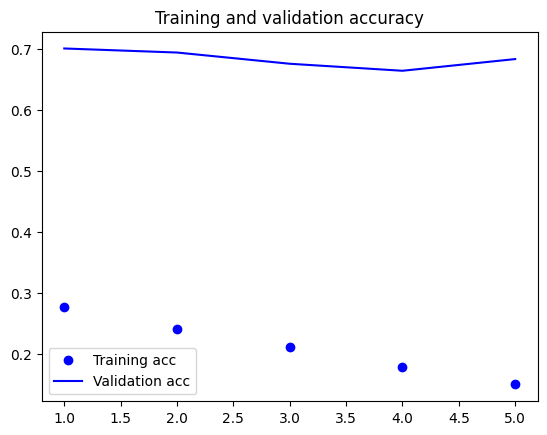

In [109]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# model 2 REMOVE BENIGN 


In [7]:
from tensorflow import keras 
from keras.models import Input
from tensorflow.keras.callbacks import ModelCheckpoint

import os, shutil
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, applications
from tensorflow.keras import models
from keras.layers import Dropout
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import  EfficientNetB2
from tensorflow.keras.callbacks import  TensorBoard
from keras.layers import Dense, Activation, Flatten, Conv2D, BatchNormalization,GlobalAveragePooling2D
from keras.models import Model
import albumentations
import cv2
from PIL import Image
import numpy as np

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("GPU: ", tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())
print(tf.version.VERSION)


# Set parameters
num_classes = 2
batch_size = 64

epochs = 100
filepath = "bestsave.h5"
base_dir="C:/Users/Migue/Desktop/thesis_data/image_splits_sembenign"
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')
validate_dir = os.path.join(base_dir, 'validate')
image_size=128
# Define a function to convert input data to uint8
def to_uint8(image):
    return (image * 255).astype(np.uint8)

def get_transforms(image_size):

    transforms_train = albumentations.Compose([
        albumentations.Transpose(p=0.5),
        albumentations.VerticalFlip(p=0.5),
        #albumentations.HorizontalFlip(p=0.5),
        #albumentations.RandomBrightness(limit=0.2, p=0.75),
        #albumentations.RandomContrast(limit=0.2, p=0.75),
        #albumentations.Lambda(image=to_uint8)
        #albumentations.CLAHE(clip_limit=4.0, p=0.7),
        albumentations.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
        albumentations.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
        albumentations.Resize(image_size, image_size),
        albumentations.Cutout(max_h_size=int(image_size * 0.375), max_w_size=int(image_size * 0.375), num_holes=1, p=0.7),
        albumentations.Normalize()
    ])

    transforms_val = albumentations.Compose([
        albumentations.Resize(image_size, image_size),
        albumentations.Normalize()
    ])


    return transforms_train, transforms_val


Num GPUs Available:  1
GPU:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True
2.7.0


In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler

def load_and_preprocess_data(image_size):

    # Apply the augmentations to the train and validation sets
    
    transforms_train, transforms_val = get_transforms(image_size)
    
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=lambda x: transforms_train(image=x)['image'])
    
    val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=lambda x: transforms_val(image=x)['image']
    )
    test_datagen = ImageDataGenerator(rescale=1./255)


    trainGen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=16,
    class_mode='binary')

    valGen = val_datagen.flow_from_directory(
    validate_dir,
    target_size=(image_size, image_size),
    batch_size=16,
    class_mode='binary')
    
    testGen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=16,
    class_mode='binary')

    # Apply the transformations to your dataset
    return trainGen, valGen

# Design the deep CNN model
def build_model(image_size, num_classes):
    #transfer learning
    #base_model = applications.Xception(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    #base_model.trainable = False
    #actually deep learning connected model
    try:

        model = models.Sequential([
            #base_model,
            #layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
            layers.GlobalAveragePooling2D(),
            layers.Dense(512, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(1024, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.2),
            layers.Flatten(),
            layers.Dense(1, activation='sigmoid')])
    except Exception as e:
        print("Error:", e)
    
    
    #Callbacks inclusion

#     checkpoint = ModelCheckpoint(filepath, monitor='val_recall', verbose=1, 
#                              save_best_only=True, mode='max')

#     reduce_lr = ReduceLROnPlateau(monitor='val_recall', factor=0.5, patience=2, 
#                                    verbose=1, mode='max', min_lr=0.00001)
                              
                              
#     callbacks_list = [checkpoint, reduce_lr]
    
    #IMPORTANT: make sure recall is valued more
    #class_weights = {0: 1.0, 1: 0, 2: 0}
    
    model.compile(optimizer=optimizers.Adam(lr=1e-3
                                           ),
                  loss='binary_crossentropy',
                  metrics=[keras.metrics.Recall(),'accuracy',tf.keras.metrics.FalseNegatives()])
    print("[INFO] compiled")
  
    return model#, class_weights#, callbacks_list
# def lr_schedule(epoch, lr):
#     if epoch < 5:
#         return 1e-6
#     else:
#         return lr * 1.2
# lr_scheduler = LearningRateScheduler(lr_schedule)
def lr_schedule(epoch, lr):
    if epoch < 5:
        return 1e-6 * (epoch + 1)
    elif epoch % 10 == 0:
        return lr * 0.9
    else:
        return lr

lr_scheduler = LearningRateScheduler(lr_schedule)


# Training and evaluating the model
def train_model(model, train_data, val_data, batch_size, epochs):

    history = model.fit(train_data,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=val_data,
                        callbacks=[lr_scheduler],
                       #callbacks=callbacks_list,
                       class_weight={0: 2, 1: 1} #weigh class 0 with more importance (melanoma)
                       )

    return history



# Load and preprocess data
train_data, val_data = load_and_preprocess_data(image_size)
print("[INFO] creating model, transfer learning base [off now], callbacks and compiling...")
# Create the modelt
model = build_model(image_size, num_classes)

print("[INFO] training model...")

# Train and evaluate the model
history = train_model(model, train_data, val_data, batch_size, epochs)
print("[INFO] saving model...")

# Save the model
model.save('/models/melanoma_deep_cnn.h5')

Found 13929 images belonging to 2 classes.
Found 1758 images belonging to 2 classes.
Found 1808 images belonging to 2 classes.
[INFO] creating model, transfer learning base [off now], callbacks and compiling...
[INFO] compiled
[INFO] training model...
Epoch 1/100
871/871 [==============================] - 108s 124ms/step - loss: 0.9792 - recall_3: 0.4250 - accuracy: 0.4939 - false_negatives_3: 4714.0000 - val_loss: 0.6950 - val_recall_3: 0.0099 - val_accuracy: 0.4243 - val_false_negatives_3: 1005.0000 - lr: 1.0000e-06
Epoch 2/100
871/871 [==============================] - 105s 120ms/step - loss: 0.9716 - recall_3: 0.1678 - accuracy: 0.4445 - false_negatives_3: 6822.0000 - val_loss: 0.6988 - val_recall_3: 0.0000e+00 - val_accuracy: 0.4226 - val_false_negatives_3: 1015.0000 - lr: 2.0000e-06
Epoch 3/100
871/871 [==============================] - 104s 120ms/step - loss: 0.9674 - recall_3: 0.0448 - accuracy: 0.4193 - false_negatives_3: 7831.0000 - val_loss: 0.7035 - val_recall_3: 0.0000e+00

Epoch 30/100
871/871 [==============================] - 104s 119ms/step - loss: 0.9563 - recall_3: 0.0154 - accuracy: 0.4170 - false_negatives_3: 8072.0000 - val_loss: 0.7487 - val_recall_3: 0.0433 - val_accuracy: 0.4420 - val_false_negatives_3: 971.0000 - lr: 4.0500e-06
Epoch 31/100
871/871 [==============================] - 104s 120ms/step - loss: 0.9560 - recall_3: 0.0188 - accuracy: 0.4186 - false_negatives_3: 8044.0000 - val_loss: 0.7473 - val_recall_3: 0.0483 - val_accuracy: 0.4431 - val_false_negatives_3: 966.0000 - lr: 3.6450e-06
Epoch 32/100
871/871 [==============================] - 104s 120ms/step - loss: 0.9548 - recall_3: 0.0220 - accuracy: 0.4196 - false_negatives_3: 8018.0000 - val_loss: 0.7498 - val_recall_3: 0.0512 - val_accuracy: 0.4448 - val_false_negatives_3: 963.0000 - lr: 3.6450e-06
Epoch 33/100
871/871 [==============================] - 104s 119ms/step - loss: 0.9575 - recall_3: 0.0209 - accuracy: 0.4194 - false_negatives_3: 8027.0000 - val_loss: 0.7463 - val_rec

871/871 [==============================] - 104s 119ms/step - loss: 0.9500 - recall_3: 0.0983 - accuracy: 0.4499 - false_negatives_3: 7392.0000 - val_loss: 0.7413 - val_recall_3: 0.1271 - val_accuracy: 0.4795 - val_false_negatives_3: 886.0000 - lr: 2.1523e-06
Epoch 91/100
871/871 [==============================] - 104s 119ms/step - loss: 0.9508 - recall_3: 0.0956 - accuracy: 0.4481 - false_negatives_3: 7414.0000 - val_loss: 0.7394 - val_recall_3: 0.1310 - val_accuracy: 0.4812 - val_false_negatives_3: 882.0000 - lr: 1.9371e-06
Epoch 92/100
871/871 [==============================] - 104s 120ms/step - loss: 0.9481 - recall_3: 0.1059 - accuracy: 0.4533 - false_negatives_3: 7330.0000 - val_loss: 0.7397 - val_recall_3: 0.1320 - val_accuracy: 0.4818 - val_false_negatives_3: 881.0000 - lr: 1.9371e-06
Epoch 93/100
871/871 [==============================] - 105s 120ms/step - loss: 0.9496 - recall_3: 0.1019 - accuracy: 0.4506 - false_negatives_3: 7363.0000 - val_loss: 0.7404 - val_recall_3: 0.1330

In [9]:
transforms_train, transforms_val = get_transforms(image_size)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=lambda x: transforms_val(image=x)['image']
    )

testGen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size,image_size),
    batch_size=16,
    class_mode='binary')

y_pred = model.predict(testGen)
y_pred_labels = np.argmax(y_pred, axis=1)
test_labels = testGen.classes

Found 1808 images belonging to 2 classes.


In [10]:
testGen.class_indices


{'MEL': 0, 'Other Diseases': 1}

In [64]:
from tensorflow import keras 
from keras.models import Input
from tensorflow.keras.callbacks import ModelCheckpoint

import os, shutil
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, applications
from tensorflow.keras import models
from keras.layers import Dropout
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import  EfficientNetB2
from tensorflow.keras.callbacks import  TensorBoard
from keras.layers import Dense, Activation, Flatten, Conv2D, BatchNormalization,GlobalAveragePooling2D
from keras.models import Model
import albumentations
import cv2
from PIL import Image
import numpy as np

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("GPU: ", tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())
print(tf.version.VERSION)


# Set parameters
num_classes = 2
batch_size = 64 
epochs = 500
filepath = "bestsave.h5"
base_dir="C:/Users/Migue/Desktop/thesis_data/image_splits_MELandBEN"
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')
validate_dir = os.path.join(base_dir, 'validate')
image_size=128
# Define a function to convert input data to uint8
def to_uint8(image):
    return (image * 255).astype(np.uint8)

def get_transforms(image_size):

    transforms_train = albumentations.Compose([
        albumentations.Transpose(p=0.5),
        albumentations.VerticalFlip(p=0.5),
        albumentations.HorizontalFlip(p=0.5),
        albumentations.RandomBrightness(limit=0.2, p=0.75),
        albumentations.RandomContrast(limit=0.2, p=0.75),
        #albumentations.Lambda(image=to_uint8)
        #albumentations.CLAHE(clip_limit=4.0, p=0.7),
        albumentations.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
        albumentations.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
        albumentations.Resize(image_size, image_size),
        albumentations.Cutout(max_h_size=int(image_size * 0.375), max_w_size=int(image_size * 0.375), num_holes=1, p=0.7),
        albumentations.Normalize()
    ])

    transforms_val = albumentations.Compose([
        albumentations.Resize(image_size, image_size),
        albumentations.Normalize()
    ])


    return transforms_train, transforms_val


Num GPUs Available:  1
GPU:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True
2.7.0


In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
def load_and_preprocess_data(image_size):

    # Apply the augmentations to the train and validation sets
    
    transforms_train, transforms_val = get_transforms(image_size)
    
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=lambda x: transforms_train(image=x)['image'])
    
    val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=lambda x: transforms_val(image=x)['image']
    )
    test_datagen = ImageDataGenerator(rescale=1./255)


    trainGen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=16,
    class_mode='binary')

    valGen = val_datagen.flow_from_directory(
    validate_dir,
    target_size=(image_size, image_size),
    batch_size=16,
    class_mode='binary')
    
    testGen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=16,
   
    class_mode='binary')

    # Apply the transformations to your dataset
    return trainGen, valGen

# Design the deep CNN model
def build_model(image_size, num_classes):
    #transfer learning
    #base_model = applications.Xception(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    #base_model.trainable = False
    #actually deep learning connected model
    
    model = models.Sequential([
        #base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1024, activation='relu'),
        #layers.Dropout(0.5),
        #keras.layers.Dense(2048, activation='relu'),
     keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    
    #Callbacks inclusion
#     checkpoint = ModelCheckpoint(filepath, monitor='val_recall', verbose=1, 
#                              save_best_only=True, mode='max')

#     reduce_lr = ReduceLROnPlateau(monitor='val_recall', factor=0.5, patience=2, 
#                                    verbose=1, mode='max', min_lr=0.00001)
                              
                              
#     callbacks_list = [checkpoint, reduce_lr]
    
    #IMPORTANT: make sure recall is valued more
    #class_weights = {0: 1.0, 1: 0, 2: 0}
    
    model.compile(optimizer=optimizers.Adam(lr=1e-4),
                  loss='binary_crossentropy',
                  metrics=[keras.metrics.Recall(),'accuracy',tf.keras.metrics.FalseNegatives()])
    print("[INFO] compiled")
  
    return model#, class_weights#, callbacks_list


# Training and evaluating the model
def train_model(model, train_data, val_data, batch_size, epochs):

    history = model.fit(train_data,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=val_data,
                        class_weight = {0: 1.0, 1: 1}
                       #callbacks=callbacks_list,weigh class 1 with more importance (melanoma)
                       )

    return history



# Load and preprocess data
train_data, val_data = load_and_preprocess_data(image_size)
print("[INFO] creating model, transfer learning base [off now], callbacks and compiling...")
# Create the model
model = build_model(image_size, num_classes)

print("[INFO] training model...")

# Train and evaluate the model
history = train_model(model, train_data, val_data, batch_size, epochs)
print("[INFO] saving model...")

# Save the model
model.save('/models/melanoma_deep_cnn.h5')

Found 13929 images belonging to 2 classes.
Found 1758 images belonging to 2 classes.
Found 1808 images belonging to 2 classes.
[INFO] creating model, transfer learning base [off now], callbacks and compiling...
[INFO] compiled
[INFO] training model...
Epoch 1/100
871/871 [==============================] - 114s 131ms/step - loss: 0.6797 - recall_8: 0.9613 - accuracy: 0.5822 - false_negatives_8: 317.0000 - val_loss: 0.6631 - val_recall_8: 0.7635 - val_accuracy: 0.5904 - val_false_negatives_8: 240.0000
Epoch 2/100
871/871 [==============================] - 126s 144ms/step - loss: 0.6761 - recall_8: 0.9756 - accuracy: 0.5842 - false_negatives_8: 200.0000 - val_loss: 0.6624 - val_recall_8: 0.9892 - val_accuracy: 0.5830 - val_false_negatives_8: 11.0000
Epoch 3/100
871/871 [==============================] - 129s 148ms/step - loss: 0.6727 - recall_8: 0.9743 - accuracy: 0.5888 - false_negatives_8: 211.0000 - val_loss: 0.6635 - val_recall_8: 0.8985 - val_accuracy: 0.5939 - val_false_negatives_8:

KeyboardInterrupt: 

In [6]:
from tensorflow import keras 
from keras.models import Input
from tensorflow.keras.callbacks import ModelCheckpoint

import os, shutil
import pandas as pd
#import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, applications
from tensorflow.keras import models
from keras.layers import Dropout
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import  EfficientNetB2
from tensorflow.keras.callbacks import  TensorBoard
from keras.layers import Dense, Activation, Flatten, Conv2D, BatchNormalization,GlobalAveragePooling2D
from keras.models import Model
import albumentations
import cv2
from PIL import Image
import numpy as np
from keras.models import load_model
# Define the custom optimizer
class CustomAdam(tf.keras.optimizers.Adam):
    pass

# Register the custom optimizer
tf.keras.utils.get_custom_objects().update({'CustomAdam': CustomAdam})

# Load the model
model = tf.keras.models.load_model('C:/Users/Migue/Downloads/basicmodel_noaug.h5', custom_objects={'CustomAdam': CustomAdam})
#model = load_model('C:/Users/Migue/Downloads/basicmodel_noaug.h5')

test_datagen = ImageDataGenerator(rescale=1./255)

testGen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size,image_size),
    batch_size=32,
    class_mode='binary')

y_pred = model.predict(testGen)
test_labels = testGen.classes



ValueError: Unknown optimizer: Custom>Adam. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [4]:
import tensorflow as tf
base_dir="C:/Users/Migue/Desktop/thesis_data/image_splits"
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')
validate_dir = os.path.join(base_dir, 'validate')

from tensorflow import keras 
from keras.models import Input
from tensorflow.keras.callbacks import ModelCheckpoint

import os, shutil
import pandas as pd
#import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, applications
from tensorflow.keras import models
from keras.layers import Dropout
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import  EfficientNetB2
from tensorflow.keras.callbacks import  TensorBoard
from keras.layers import Dense, Activation, Flatten, Conv2D, BatchNormalization,GlobalAveragePooling2D
from keras.models import Model
import albumentations
import cv2
from PIL import Image
import numpy as np
from keras.models import load_model

with tf.device('/GPU:0'):
    from tensorflow.keras import models
    from tensorflow.keras import layers
    import os
    import tensorflow as tf
    from keras.preprocessing.image import ImageDataGenerator
    print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


    base_dir = "C:/Users/Migue/Downloads/Tese/image_splits_MELandBEN"
    train_dir = os.path.join(base_dir, 'Training')
    test_dir = os.path.join(base_dir, 'Testing')
    validate_dir = os.path.join(base_dir, 'validate')

    img_size=299

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        zoom_range = 0.1 ,
        horizontal_flip=False,
        channel_shift_range=.001)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
                      batch_size=16,
        class_mode='binary')

    validation_generator = test_datagen.flow_from_directory(
        validate_dir,
        target_size=(img_size, img_size),
        batch_size=16,
        class_mode='binary')

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=16,
        class_mode='binary')

    model = models.Sequential()
    model.add(GlobalAveragePooling2D())
    model.add(tf.keras.layers.Flatten())
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(Dropout(0.3))
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(Dropout(0.3))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(Dropout(0.3))
    model.add(layers.Dense(1024, activation="relu"))
    model.add(layers.Dense(1024, activation="relu"))
    model.add(layers.Dense(1024, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(Dropout(0.3))
    model.add(layers.Dense(2048, activation="relu"))
    model.add(layers.Dense(2048, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(Dropout(0.3))
    model.add(layers.Dense(4096, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(Dropout(0.3))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    from tensorflow.keras import metrics
    opt = opt = tf.keras.optimizers.Adam(
        learning_rate=2e-5,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
        amsgrad=True,
        name="Adam")

    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=[metrics.Recall(),metrics.Precision(),'accuracy', metrics.AUC(name = 'AUC'),metrics.AUC(curve='PR', name = 'PR-AUC')
                       ,metrics.FalsePositives(), metrics.FalseNegatives(), metrics.TrueNegatives(),metrics.TruePositives()])

    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model_big_noconv_25.h5', # path to save the checkpoint
    save_weights_only=False, # save the entire model
    monitor='val_recall_2', # monitor the validation accuracy
    save_best_only=True # save only the best model
)
    history = model.fit(
        train_generator,
        epochs=25,
        validation_data=validation_generator, verbose=1,callbacks=checkpoint_callback)

Num GPUs Available:  1
Found 12166 images belonging to 2 classes.
Found 1539 images belonging to 2 classes.
Found 1521 images belonging to 2 classes.
Epoch 1/25
761/761 [==============================] - 379s 495ms/step - loss: 0.8477 - recall_2: 0.5860 - precision_2: 0.5593 - accuracy: 0.5820 - AUC: 0.6162 - PR-AUC: 0.5678 - false_positives_2: 2681.0000 - false_negatives_2: 2404.0000 - true_negatives_2: 3678.0000 - true_positives_2: 3403.0000 - val_loss: 0.6993 - val_recall_2: 0.8634 - val_precision_2: 0.5555 - val_accuracy: 0.5945 - val_AUC: 0.6455 - val_PR-AUC: 0.6004 - val_false_positives_2: 521.0000 - val_false_negatives_2: 103.0000 - val_true_negatives_2: 264.0000 - val_true_positives_2: 651.0000
Epoch 2/25
761/761 [==============================] - 407s 535ms/step - loss: 0.8222 - recall_2: 0.5790 - precision_2: 0.5661 - accuracy: 0.5872 - AUC: 0.6196 - PR-AUC: 0.5664 - false_positives_2: 2577.0000 - false_negatives_2: 2445.0000 - true_negatives_2: 3782.0000 - true_positives_2: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import NASNetMobile

with tf.device('/CPU:0'):
    from tensorflow.keras import models
    from tensorflow.keras import layers
    import os
    import tensorflow as tf
    from keras.preprocessing.image import ImageDataGenerator
    print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


    base_dir = "C:/Users/Migue/Downloads/Tese/image_splits_MELandBEN"
    train_dir = os.path.join(base_dir, 'Training')
    test_dir = os.path.join(base_dir, 'Testing')
    validate_dir = os.path.join(base_dir, 'validate')

    img_size=224
    
    xception=Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    nasnet = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    MobileNetV2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    InceptionV3=InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    
    
    models = [xception, vgg16, resnet, nasnet, MobileNetV2,InceptionV3]
    
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        zoom_range = 0.1 ,
        horizontal_flip=False,
        channel_shift_range=.001
    )

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
                      batch_size=16,
        class_mode='binary')

    validation_generator = test_datagen.flow_from_directory(
        validate_dir,
        target_size=(img_size, img_size),
        batch_size=16,
        class_mode='binary')

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=16,
        class_mode='binary')

    def ensemble(models, model_input):
        outputs = [model(model_input) for model in models]
        pooled_outputs = [GlobalAveragePooling2D()(output) for output in outputs]
        dense_outputs = [Dense(512, activation='relu')(pooled_output) for pooled_output in pooled_outputs]
        avg = keras.layers.Average()(dense_outputs)
        output = Dense(1, activation='sigmoid')(avg)  
        ensemble_model = keras.Model(inputs=model_input, outputs=output, name='ensemble')
        return ensemble_model
    
    model_input = keras.Input(shape=(img_size, img_size, 3))

    ensemble_model = ensemble(models, model_input)
    from tensorflow.keras import metrics
    
#     def f_beta_score(y_true, y_pred, beta=2):
#         y_pred = tf.round(y_pred)  # Convert probabilities to binary predictions
#         true_positives = tf.reduce_sum(y_true * y_pred)
#         false_positives = tf.reduce_sum((1 - y_true) * y_pred)
#         false_negatives = tf.reduce_sum(y_true * (1 - y_pred))

#         precision = true_positives / (true_positives + false_positives + tf.keras.backend.epsilon())
#         recall = true_positives / (true_positives + false_negatives + tf.keras.backend.epsilon())

#         numerator = (1 + beta**2) * (precision * recall)
#         denominator = (beta**2 * precision) + recall
#         f_beta = numerator / (denominator + tf.keras.backend.epsilon())

#         return f_beta
    import tensorflow_addons as tfa

    
    f_beta_score = tfa.metrics.FBetaScore(num_classes=1,threshold=0.5,beta=2.0)
    # Compile the ensemble model
    ensemble_model.compile(optimizer='adam',
                           loss='binary_crossentropy', # Or 'binary_crossentropy' for binary classification
                           metrics=[metrics.Recall(),metrics.Precision(),'accuracy', metrics.AUC(name = 'AUC'),metrics.AUC(curve='PR', name = 'PR-AUC')
                       ,metrics.FalsePositives(), metrics.FalseNegatives(), metrics.TrueNegatives(),metrics.TruePositives(),f_beta_score])
    
    checkpoint = ModelCheckpoint('best_ensemble.h5', monitor='val_f_beta_score', verbose=1,
                                 save_best_only=True, mode='max')

    # Train the ensemble model
    epochs = 10
    

    history = ensemble_model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=epochs,
        callbacks=[checkpoint]
    )

    
#model.save('supermodel_final.h5')


Num GPUs Available:  1
Found 12166 images belonging to 2 classes.
Found 1539 images belonging to 2 classes.
Found 1521 images belonging to 2 classes.
Epoch 1/10
761/761 [==============================] - 12677s 17s/step - loss: 0.5660 - recall_3: 0.7668 - precision_3: 0.7411 - accuracy: 0.7608 - AUC: 0.8340 - PR-AUC: 0.7933 - false_positives_3: 1556.0000 - false_negatives_3: 1354.0000 - true_negatives_3: 4803.0000 - true_positives_3: 4453.0000 - fbeta_score: 0.7615 - val_loss: 19.7788 - val_recall_3: 0.9562 - val_precision_3: 0.5146 - val_accuracy: 0.5367 - val_AUC: 0.5632 - val_PR-AUC: 0.5249 - val_false_positives_3: 680.0000 - val_false_negatives_3: 33.0000 - val_true_negatives_3: 105.0000 - val_true_positives_3: 721.0000 - val_fbeta_score: 0.8162
Epoch 2/10
761/761 [==============================] - 10865s 14s/step - loss: 0.4519 - recall_3: 0.8025 - precision_3: 0.7562 - accuracy: 0.7823 - AUC: 0.8665 - PR-AUC: 0.8404 - false_positives_3: 1502.0000 - false_negatives_3: 1147.0000 - 

In [ ]:
img_size=224
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=8,
    class_mode='binary',shuffle=False,
    seed=42)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import math
y_pred=ensemble_model.predict(test_generator,verbose=True,steps= math.ceil(test_generator.n / test_generator.batch_size))
print("Number of predictions:", len(y_pred))

y_test=test_generator.classes
y_pred_labels = (y_pred > 0.5).astype(int)
# Accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred_labels, average='weighted')
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred_labels, average='weighted')
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred_labels, average='weighted')
print(f"F1 Score: {f1:.4f}")


def f_beta_score(precision, recall, beta):
    numerator = (1 + beta**2) * (precision * recall)
    denominator = (beta**2 * precision) + recall
    f_beta = numerator / denominator if denominator != 0 else 0
    return f_beta
beta=3
f2_score = f_beta_score(precision, recall, beta)
print(f'F2 score: {f2_score}')
from sklearn.metrics import classification_report

target_names = ['Benign', 'Melanoma']

report = classification_report(y_test, y_pred_labels, target_names=target_names)
print("Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Define labels and title
labels = ["Benign", "Melanoma"]
title = "Confusion Matrix"


# Customize the appearance
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.6)
sns.set_style("white")

# Create a custom color map
#cmap = sns.diverging_palette(220, 20, s=90, l=60, n=5, as_cmap=True)
cmap = sns.color_palette("Blues", as_cmap=True)

#cmap = sns.diverging_palette(260, 30, s=80, l=60, n=5, as_cmap=True)



# Create a heatmap using Seaborn
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, xticklabels=labels, yticklabels=labels, annot_kws={"size": 20})

# Customize the axis labels and title
plt.xlabel("Predicted", fontsize=18, labelpad=15)
plt.ylabel("True", fontsize=18, labelpad=15)
plt.title(title, fontsize=22, pad=20)

# Customize the ticks
ax.set_xticklabels(labels, fontsize=16)
ax.set_yticklabels(labels, fontsize=16, rotation=0)


# Display the confusion matrix
plt.show()
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

In [4]:
    import tensorflow as tf
    from tensorflow.keras.utils import plot_model
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import models
    from tensorflow.keras.applications import ResNet50
    from tensorflow.keras.applications import VGG16
    from tensorflow.keras.applications import InceptionV3
    from tensorflow.keras.applications import Xception
    from tensorflow.keras.applications import MobileNetV2
    from tensorflow.keras.applications import NASNetMobile
    from keras.preprocessing.image import ImageDataGenerator
    base_dir = "C:/Users/Migue/Downloads/Tese/image_splits_MELandBEN"
    train_dir = os.path.join(base_dir, 'Training')
    test_dir = os.path.join(base_dir, 'Testing')
    validate_dir = os.path.join(base_dir, 'validate')
        # Now you can use the models module
    xception=Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    nasnet = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    MobileNetV2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    InceptionV3=InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    
    
    models = [xception, vgg16, resnet, nasnet, MobileNetV2,InceptionV3]
    
    
    img_size=224
# Assuming the ensemble_model has already been defined
# as shown in the provided code
    def ensemble(models, model_input):
        outputs = [model(model_input) for model in models]
        pooled_outputs = [tf.keras.layers.GlobalAveragePooling2D()(output) for output in outputs]
        dense_outputs = [tf.keras.layers.Dense(512, activation='relu')(pooled_output) for pooled_output in pooled_outputs]
        dropout_outputs = [tf.keras.layers.Dropout(0.25)(dense_output) for dense_output in dense_outputs]
        dense_outputs_2 = [tf.keras.layers.Dense(128, activation='relu')(dropout_output) for dropout_output in dropout_outputs]
        avg = tf.keras.layers.Average()(dense_outputs_2)
        output = tf.keras.layers.Dense(1, activation='sigmoid')(avg)
        ensemble_model = tf.keras.Model(inputs=model_input, outputs=output, name='ensemble')
        return ensemble_model


    model_input = tf.keras.Input(shape=(img_size, img_size, 3))

    ensemble_model = ensemble(models, model_input)
    from tensorflow.keras import metrics
    

    import tensorflow_addons as tfa

    
    f_beta_score = tfa.metrics.FBetaScore(num_classes=1,threshold=0.5,beta=2.0)
    # Compile the ensemble model
    opt = tf.keras.optimizers.Adam(
        learning_rate=2e-5,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
        amsgrad=True,
        name="Adam")
    ensemble_model.compile(optimizer=opt,
                           loss='binary_crossentropy', # Or 'binary_crossentropy' for binary classification
                           metrics=[metrics.Recall(),metrics.Precision(),'accuracy', metrics.AUC(name = 'AUC'),metrics.AUC(curve='PR', name = 'PR-AUC')
                       ,metrics.FalsePositives(), metrics.FalseNegatives(), metrics.TrueNegatives(),metrics.TruePositives(),f_beta_score])
    
    import tensorflow as tf
    from tensorflow.keras.utils import plot_model

    # Assuming the ensemble_model has already been defined
    # as shown in the provided code

    plot_model(ensemble_model, to_file='ensemble_model_architecture.png', show_shapes=True, show_layer_names=True, expand_nested=True)


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


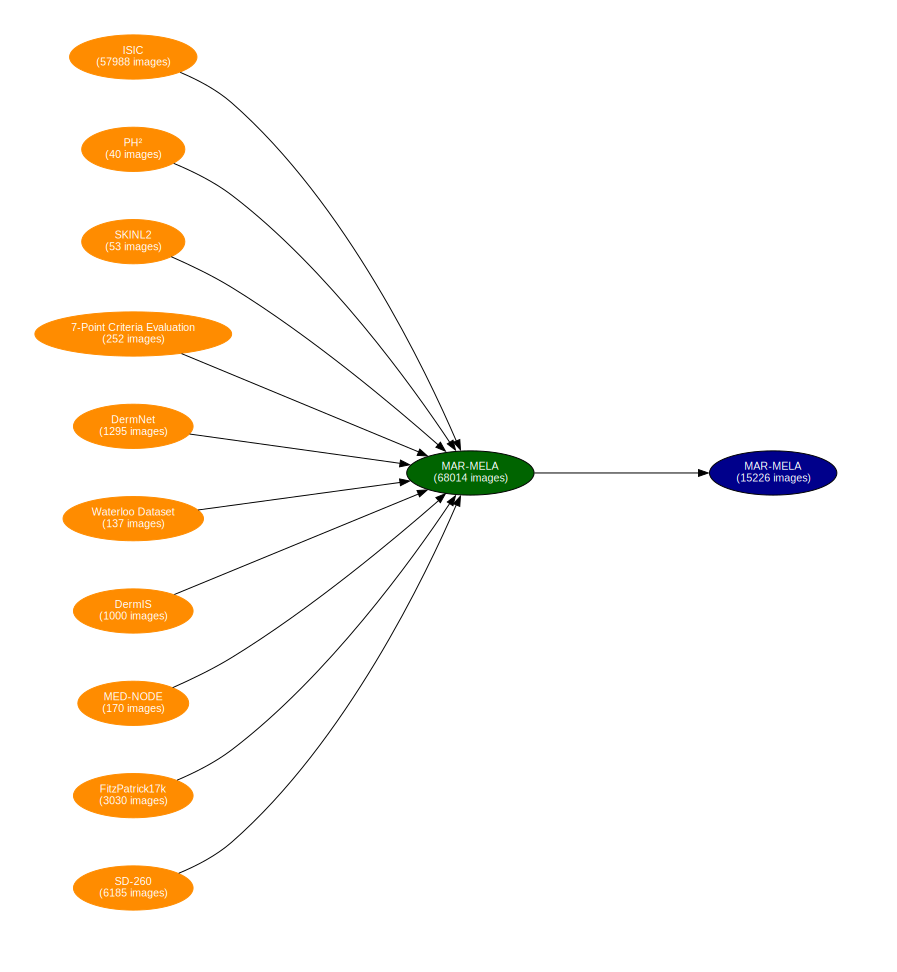

In [3]:
from graphviz import Digraph

# Create a directed graph with some styling
dot = Digraph(graph_attr={'rankdir': 'LR', 'bgcolor': 'white', 'pad': '0.5', 'nodesep': '0.7', 'ranksep': '2.5', 'dpi':'70'})

# Add nodes for each dataset with respective count
datasets = {
    "ISIC": 57988,
    "PH²": 40,
    "SKINL2": 53,
    "7-Point Criteria Evaluation": 252,
    "DermNet": 1295,
    "Waterloo Dataset": 137,
    "DermIS": 1000,
    "MED-NODE": 170,
    "FitzPatrick17k": 3030,
    "SD-260": 6185,
}

# Set node attributes
node_attr = {
    'style': 'filled',
    'fontname': 'Arial',
    'fontsize': '11',
    'fontcolor': 'white',
    'color': 'darkorange',
    'fillcolor': 'darkorange',
}

for ds, count in datasets.items():
    label = f"{ds}\n({count} images)"
    dot.node(ds, label, _attributes=node_attr)

# Add node for the final MAR-MELA dataset
dot.node("MAR-MELA-TEMP", "MAR-MELA\n(68014 images)", _attributes={'style': 'filled', 'fillcolor': 'darkgreen', 'fontcolor': 'white', 'fontname': 'Arial', 'fontsize': '11'})

# Add edges

# Add node for the MAR-MELA CNN dataset
dot.node("MAR-MELA", "MAR-MELA\n(15226 images)", _attributes={'style': 'filled', 'fillcolor': 'darkblue', 'fontcolor': 'white', 'fontname': 'Arial', 'fontsize': '11'})

# Add edges to show the merge of datasets
for ds in datasets:
    dot.edge(ds, "MAR-MELA-TEMP")

# Add edge from MAR-MELA to MAR-MELA CNN
dot.edge("MAR-MELA-TEMP", "MAR-MELA")

# Save the visualization as a PNG file
dot.format = "png"
dot.render("mar-mela_merge_pretty_cnn", cleanup=True)

# Display the graph in Jupyter Notebook or IPython
# Note: The following line should be used only in Jupyter Notebook or IPython
dot
